# Lorenz Equations

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy.integrate.solve_ivp` to compute the solution.

In [2]:
def lorenz(t, x):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        t (float): The time value t
        x ((3,) ndarray): The state values (x,y,z)
    Returns:
        ((3,) ndarray): The derivative values
    """
    x_dot = σ*(x[1] - x[0]) #derivatives in each direction
    y_dot = ρ*x[0] - x[1] - x[0]*x[2] 
    z_dot = x[0]*x[1] - β*x[2]
    return np.array([x_dot,y_dot,z_dot])

<IPython.core.display.Javascript object>


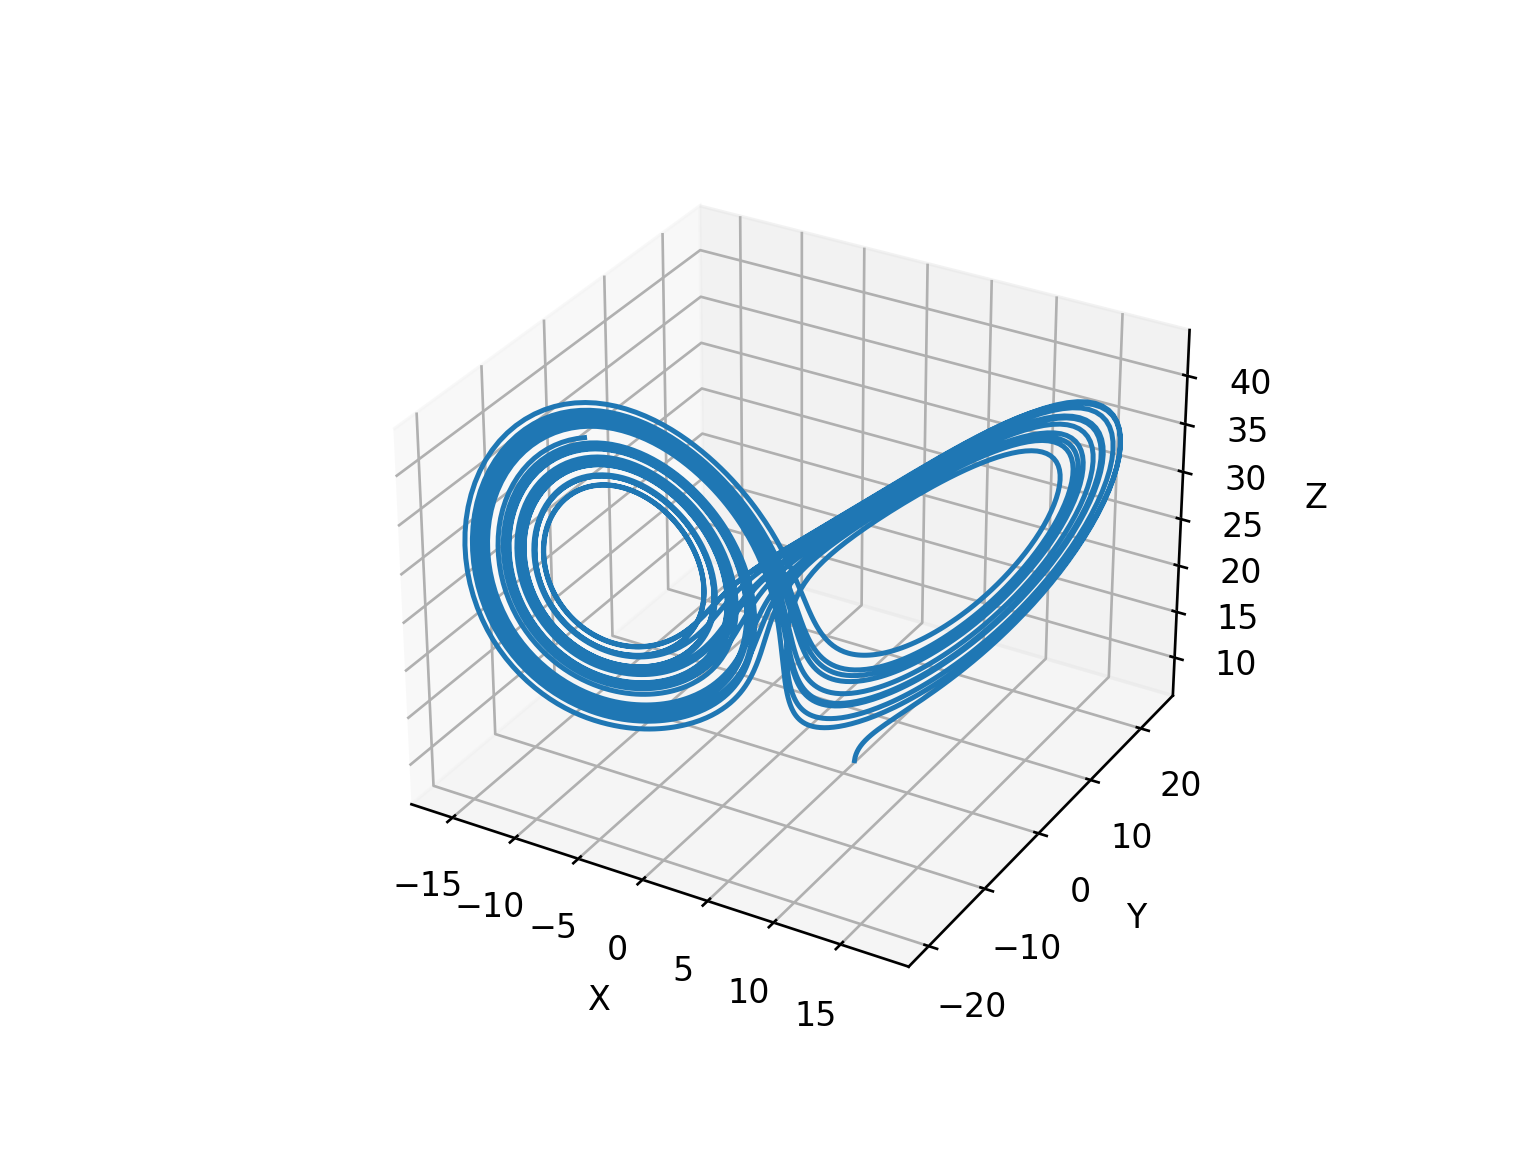

In [3]:
σ,ρ,β = 10,28,8/3 #hyperparameters
y0 = np.random.uniform(-15,15,3)
a,b = 0,25
t_span = (a,b)
t_eval = np.linspace(a,b,5001)
soln = solve_ivp(lorenz,t_span,y0,t_eval=t_eval)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d') #project solution onto 3d space
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.plot(soln.y[0],soln.y[1],soln.y[2])
plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

<IPython.core.display.Javascript object>


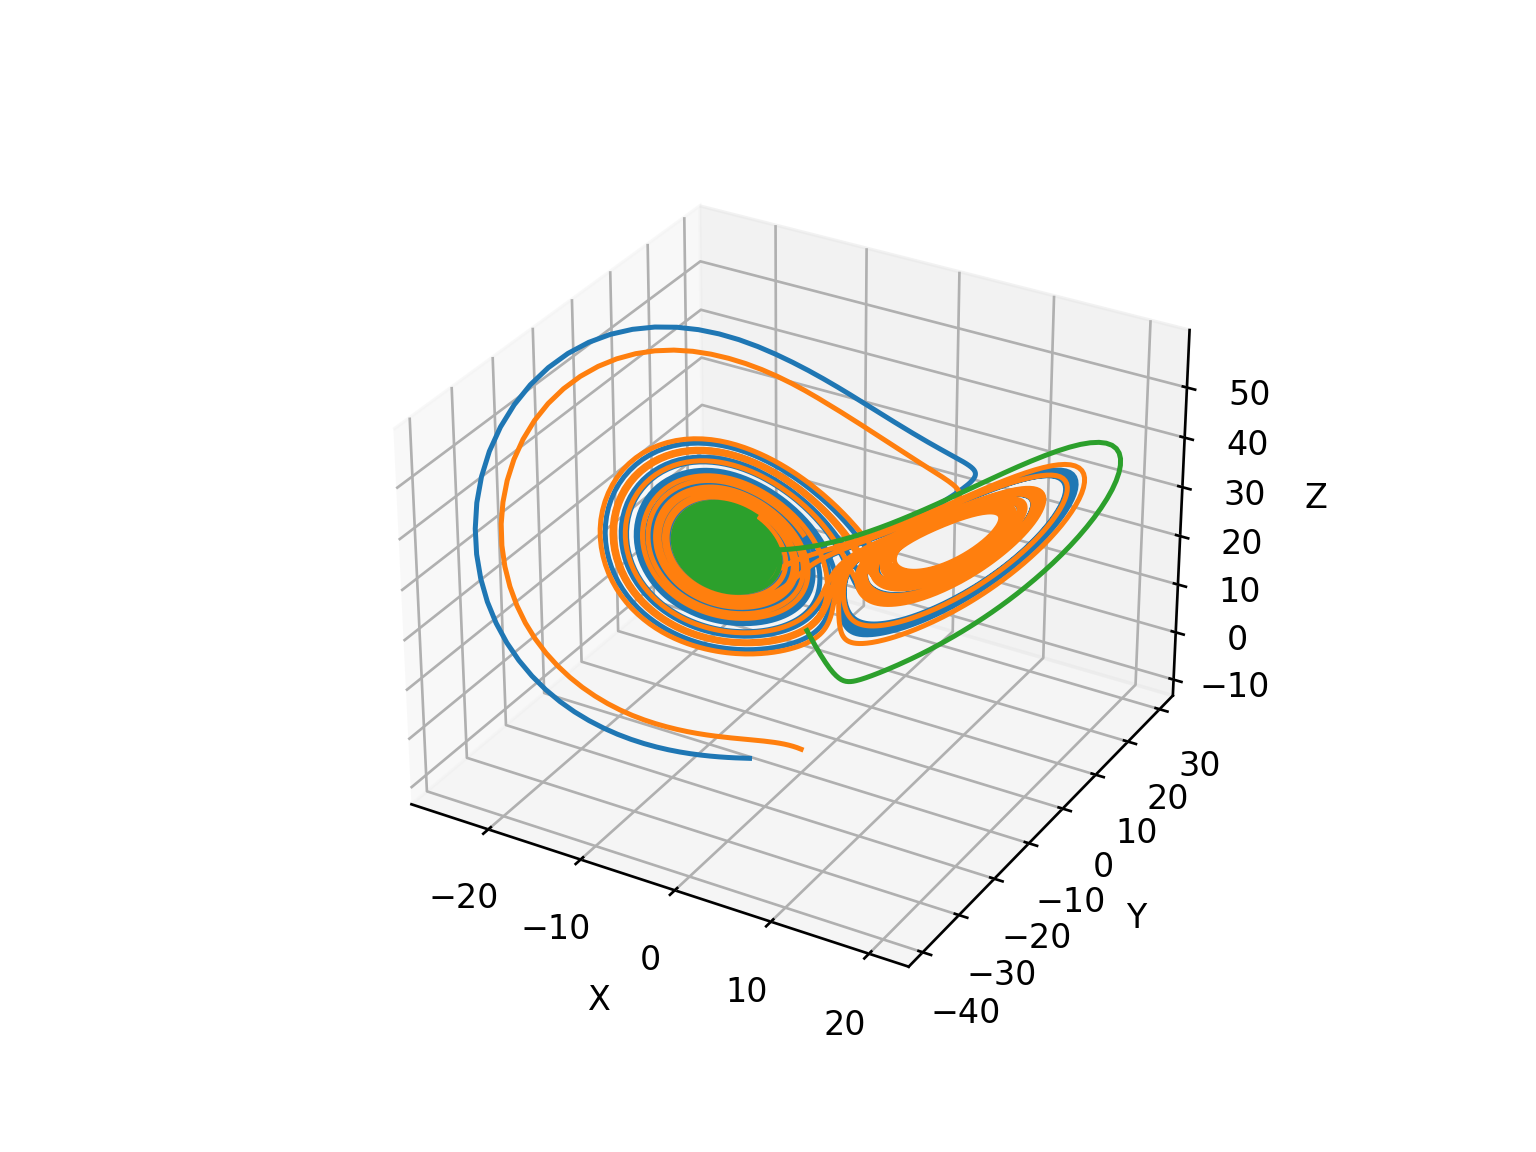

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

y0 = np.random.uniform(-15,15,3) #first random initial condition
soln1 = solve_ivp(lorenz,t_span,y0,t_eval=t_eval)
plt.plot(soln1.y[0],soln1.y[1],soln1.y[2])

y1 = np.random.uniform(-15,15,3) #second random initial condition
soln2 = solve_ivp(lorenz,t_span,y1,t_eval=t_eval)
plt.plot(soln2.y[0],soln2.y[1],soln2.y[2])

y2 = np.random.uniform(-15,15,3) #third random initial condition
soln3 = solve_ivp(lorenz,t_span,y2,t_eval=t_eval)
plt.plot(soln3.y[0],soln3.y[1],soln3.y[2])

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [5]:
a,b = 0,25
t_span = (a,b)
t_eval = np.linspace(a,b,5001)
y0 = np.random.uniform(-15,15,3)
soln = solve_ivp(lorenz,t_span,y0,t_eval=t_eval)
y0_pert = np.random.randn(3)*(1e-5) + y0
soln_pert = solve_ivp(lorenz,t_span,y0_pert,t_eval=t_eval)

<IPython.core.display.Javascript object>


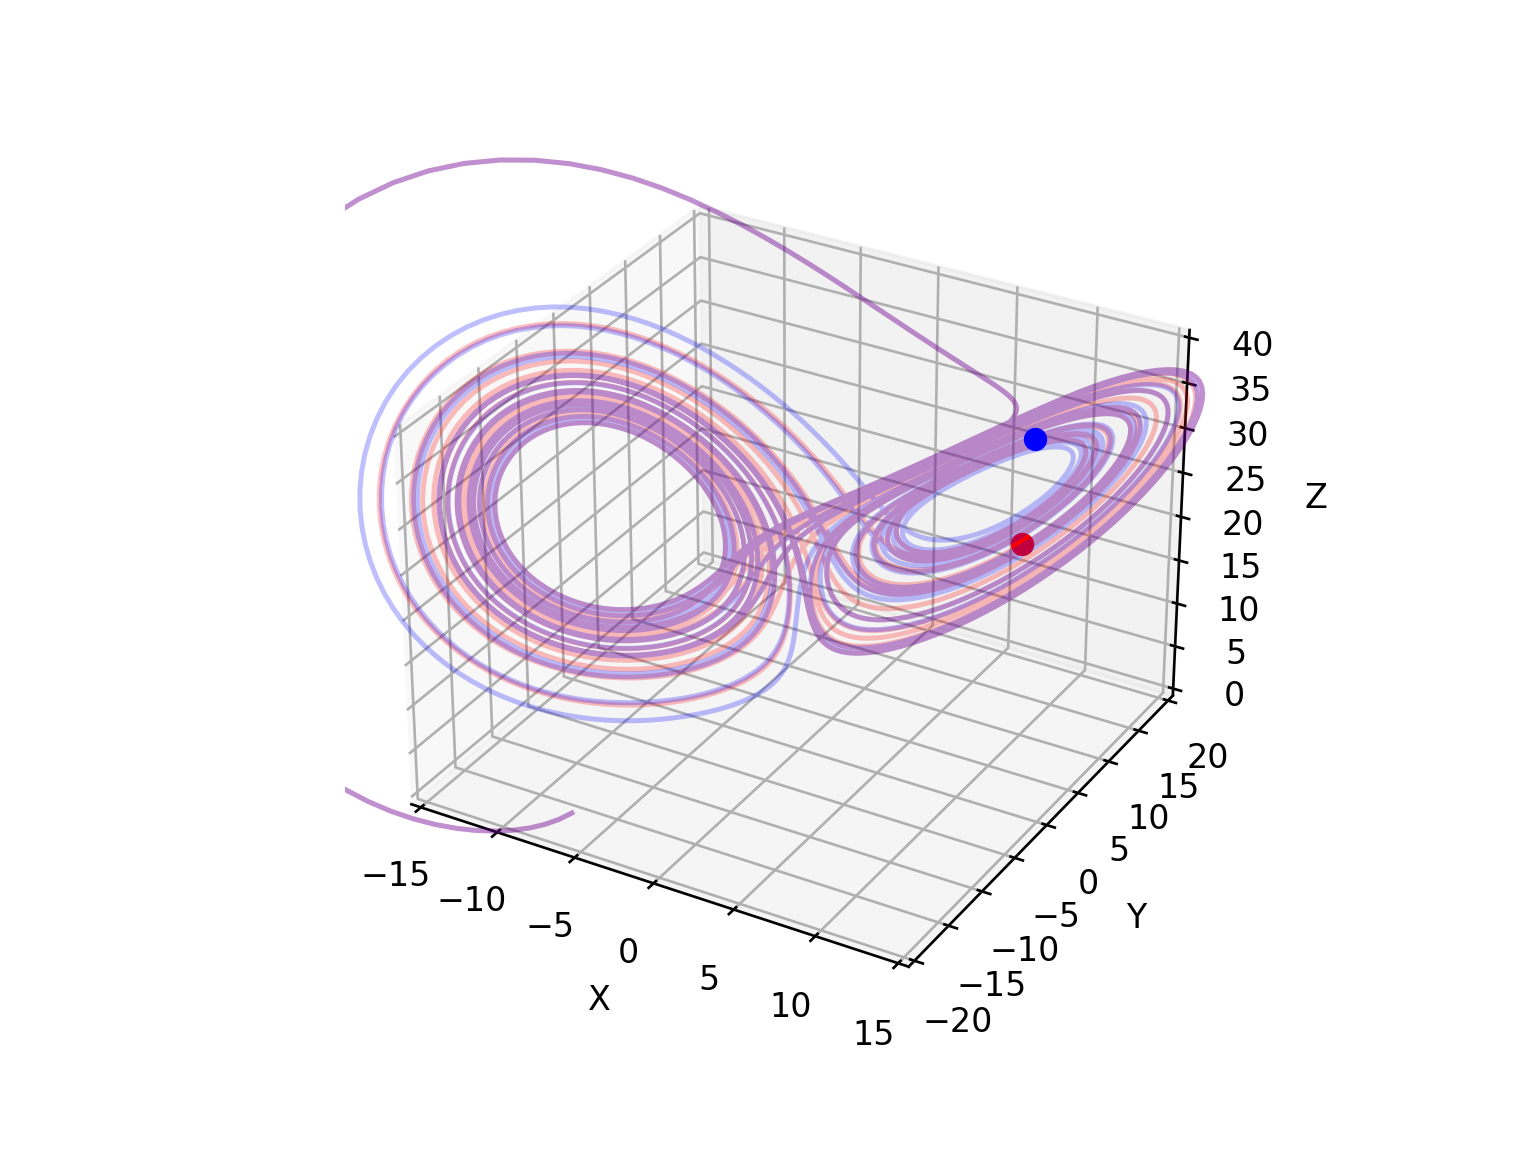

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.set_xlim((-15,15))
ax.set_ylim((-20,20))
ax.set_zlim((0,40))

particle, = plt.plot([],[], marker='o', color='r') #particle object
traj, = plt.plot([],[], color='r', alpha=0.25) #trajectory object
particle_2, = plt.plot([],[], marker='o', color='b') #particle object
traj_2, = plt.plot([],[], color='b', alpha=0.25) #trajectory object

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

def update(i):
    traj.set_data_3d(soln.y[0,:i],soln.y[1,:i],soln.y[2,:i])
    particle.set_data_3d(soln.y[0,i],soln.y[1,i],soln.y[2,i])
    traj_2.set_data_3d(soln_pert.y[0,:i],soln_pert.y[1,:i],soln_pert.y[2,:i])
    particle_2.set_data_3d(soln_pert.y[0,i],soln_pert.y[1,i],soln_pert.y[2,i])
    return particle,traj,particle_2,traj_2
plt.show()
plt.ioff()
ani = animation.FuncAnimation(fig, update, frames=range(5000), interval=1) #animates the changes in particle/trajectory
ani.save("problem3.mp4")

<video src="problem3.mp4" controls>

## Problem 4
The `solve_ivp` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the `solve_ivp` arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

In [7]:
a,b = 0,25
t_span = (a,b)
t_eval = np.linspace(a,b,5001)
y0 = np.random.uniform(-15,15,3)
soln1 = solve_ivp(lorenz,t_span,y0,t_eval=t_eval,atol=1e-15, rtol=1e-13)
soln2 = solve_ivp(lorenz,t_span,y0,t_eval=t_eval,atol=1e-12, rtol=1e-10)

<IPython.core.display.Javascript object>


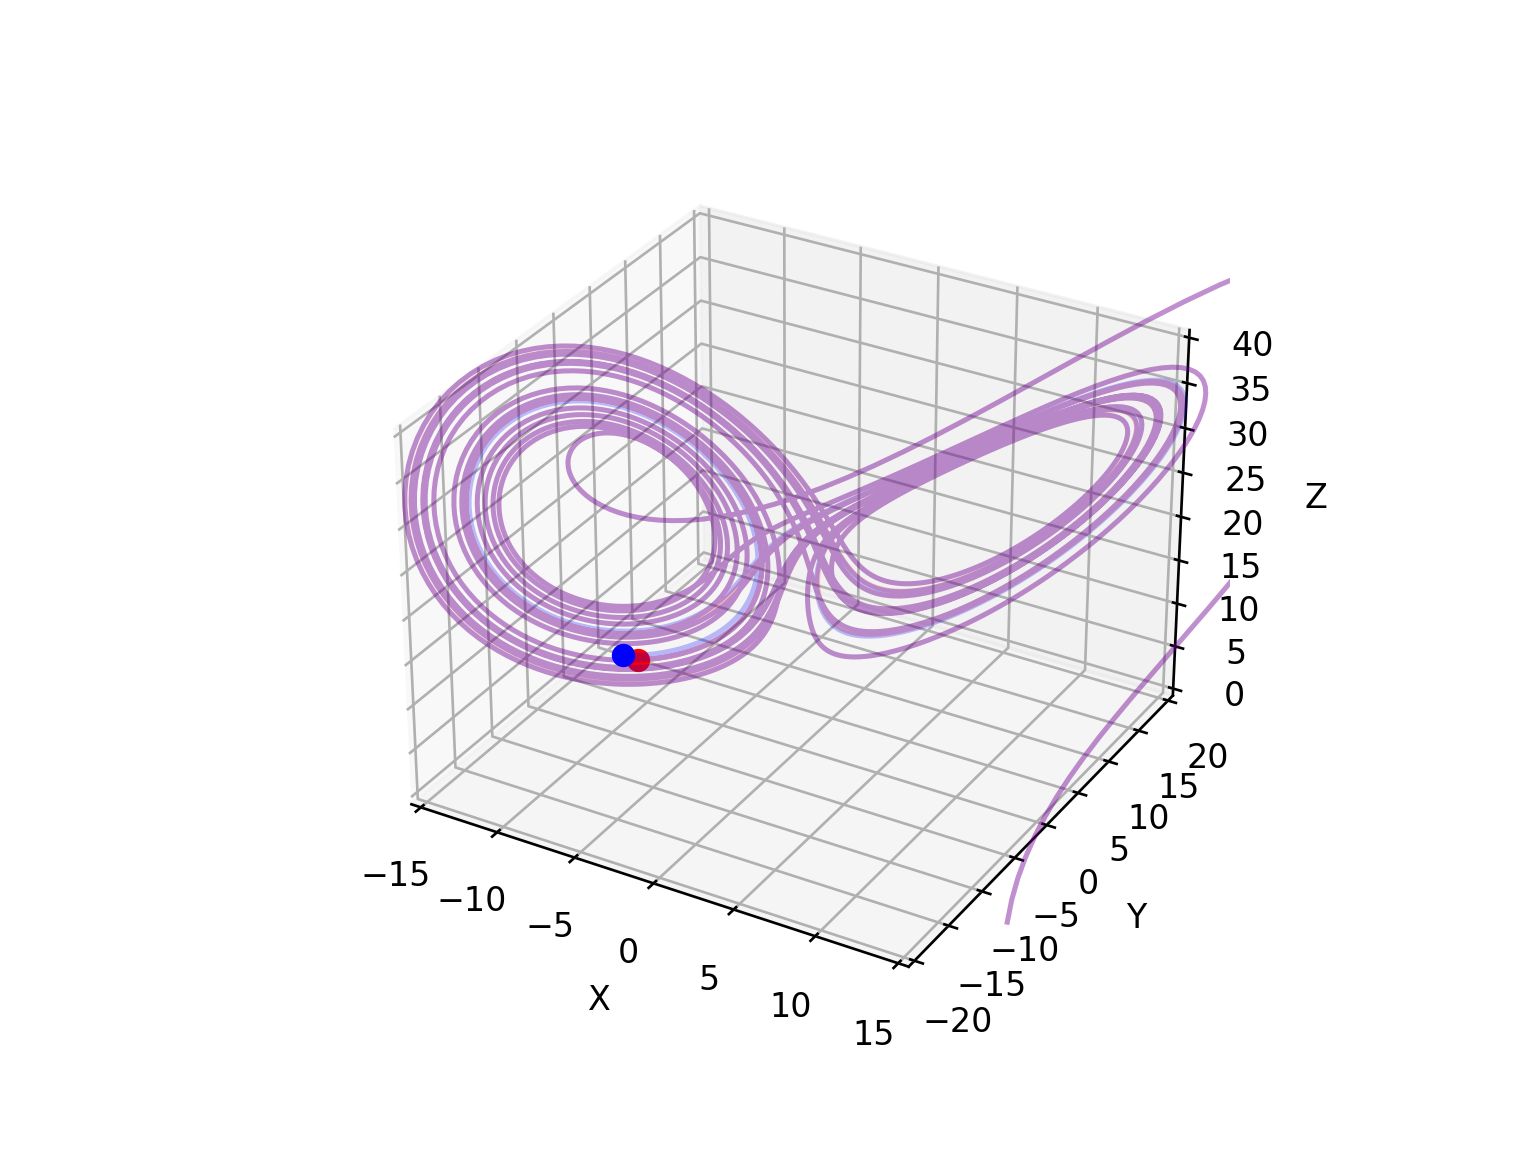

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlim((-15,15))
ax.set_ylim((-20,20))
ax.set_zlim((0,40))
particle_1, = plt.plot([],[], marker='o', color='r') #particle object
traj_1, = plt.plot([],[], color='r', alpha=0.25) #trajectory object
particle_2, = plt.plot([],[], marker='o', color='b') #particle object
traj_2, = plt.plot([],[], color='b', alpha=0.25) #trajectory object

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

def update(i):
    traj_1.set_data_3d(soln1.y[0,:i],soln1.y[1,:i],soln1.y[2,:i])
    particle_1.set_data_3d(soln1.y[0,i],soln1.y[1,i],soln1.y[2,i])
    traj_2.set_data_3d(soln2.y[0,:i],soln2.y[1,:i],soln2.y[2,:i])
    particle_2.set_data_3d(soln2.y[0,i],soln2.y[1,i],soln2.y[2,i])
    return particle_1,traj_1,particle_2,traj_2

plt.show()
plt.ioff()
ani = animation.FuncAnimation(fig, update, frames=range(5000), interval=1) #animates the changes in particle/trajectory
ani.save("prob4.mp4")

<video src="prob4.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `solve_ivp` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

In [15]:
a,b=0,10
t_span = (a,b)
t_eval = np.linspace(a,b,501)

y0 = np.random.uniform(-15,15,3)
soln = solve_ivp(lorenz,t_span,y0,t_eval=t_eval)
y0 = soln.y[:,-1] #dummy

soln = solve_ivp(lorenz,t_span,y0,t_eval=t_eval)
y0_pert = np.random.randn(3)*(1e-5) + y0 #get perturbed bro

soln_pert = solve_ivp(lorenz,t_span,y0_pert,t_eval=t_eval) #perturbed solution

delta_arr = np.linalg.norm(soln.y-soln_pert.y,axis=0)

In [16]:
m,b = linregress(t_eval,np.log(delta_arr))[:2] #linear regression

<IPython.core.display.Javascript object>


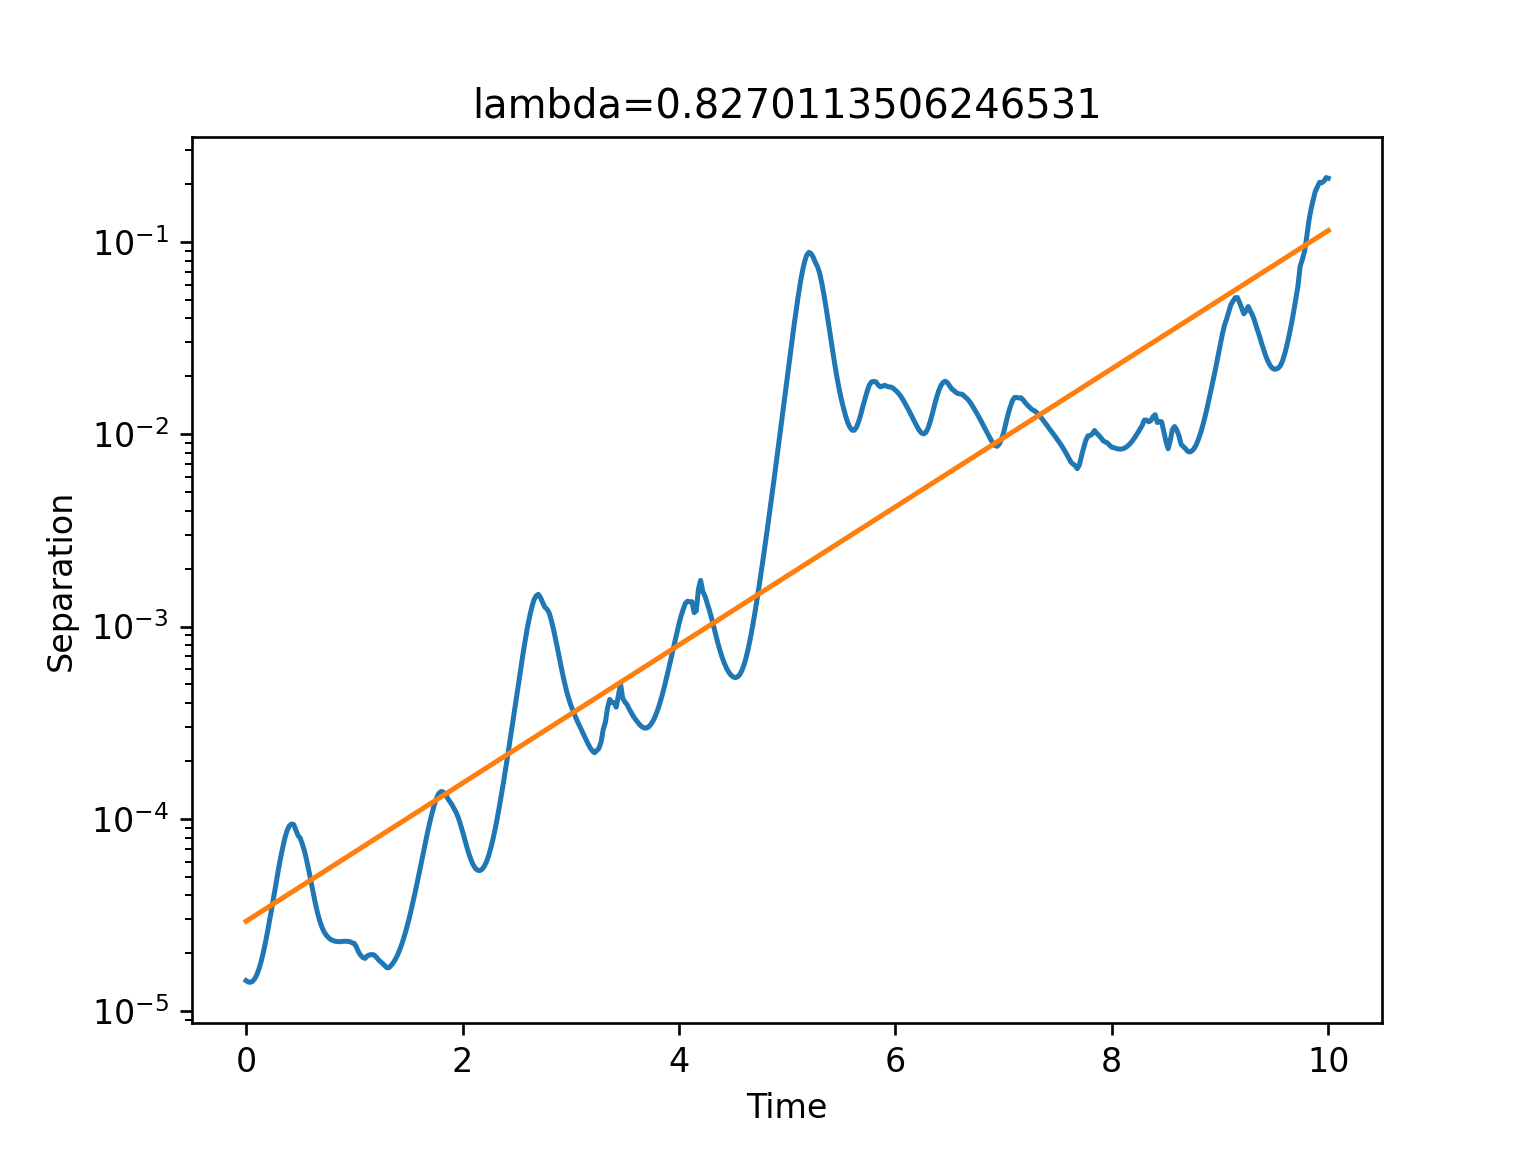

In [17]:
plt.semilogy(t_eval,delta_arr)
plt.semilogy(t_eval,np.exp(m*t_eval+b))
plt.title(f"lambda={m}")
plt.xlabel("Time")
plt.ylabel("Separation")
plt.show()